In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Checking DF stats

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Unique vals in each category

In [10]:
print("categories in gender :" , end=" ")
print(df["gender"].unique())
print("categories in race_ethnicity :" , end=" ")
print(df["race_ethnicity"].unique())
print("categories in parental_level_of_education :" , end=" ")
print(df["parental_level_of_education"].unique())
print("categories in lunch :" , end=" ")
print(df["lunch"].unique())
print("categories in test_preparation_course :" , end=" ")
print(df["test_preparation_course"].unique())

categories in gender : ['female' 'male']
categories in race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch : ['standard' 'free/reduced']
categories in test_preparation_course : ['none' 'completed']


Numerical and Categorical Cols

In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print( "there are", len(numeric_features), "numerical features :", numeric_features)
print("there are", len(categorical_features),  "categorical features :", categorical_features)

there are 3 numerical features : ['math_score', 'reading_score', 'writing_score']
there are 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding cols : "Total Score" & "Avg Score"

In [12]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["avg"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df["reading_score"]==100]["avg"].count()
writing_full = df[df["writing_score"]==100]["avg"].count()
math_full = df[df["math_score"]==100]["avg"].count()

print("No. of student with full marks in reading: ", reading_full)
print("No. of student with full marks in writing: ", writing_full)
print("No. of student with full marks in math: ", math_full)

No. of student with full marks in reading:  17
No. of student with full marks in writing:  14
No. of student with full marks in math:  7


In [ ]:
reading_less_20 = df[df["reading_score"]<=20]["avg"].count()
writing_less_20 = df[df["writing_score"]<=20]["avg"].count()
math_less_20 = df[df["math_score"]<=20]["avg"].count()

print("No. of student with less than 20 marks in reading: ", reading_less_20)
print("No. of student with less than 20 marks in writing: ", writing_less_20)
print("No. of student with less than 20 marks in math: ", math_less_20)

No. of student with less than 20 marks in reading:  1
No. of student with less than 20 marks in writing:  3
No. of student with less than 20 marks in math:  4


Histogram

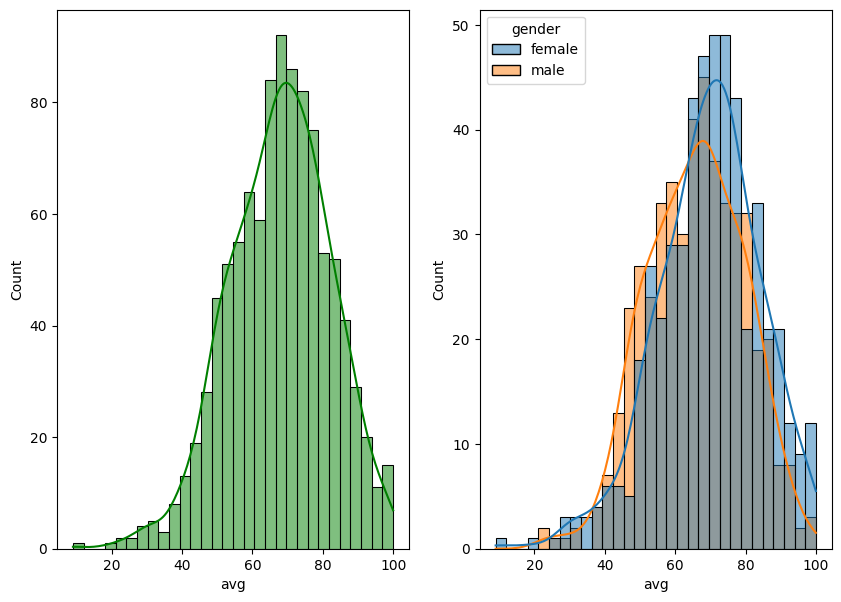

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
plt.subplot(121)
sns.histplot(data=df, x="avg", bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x="avg", bins=30, kde=True,hue="gender")
plt.show()

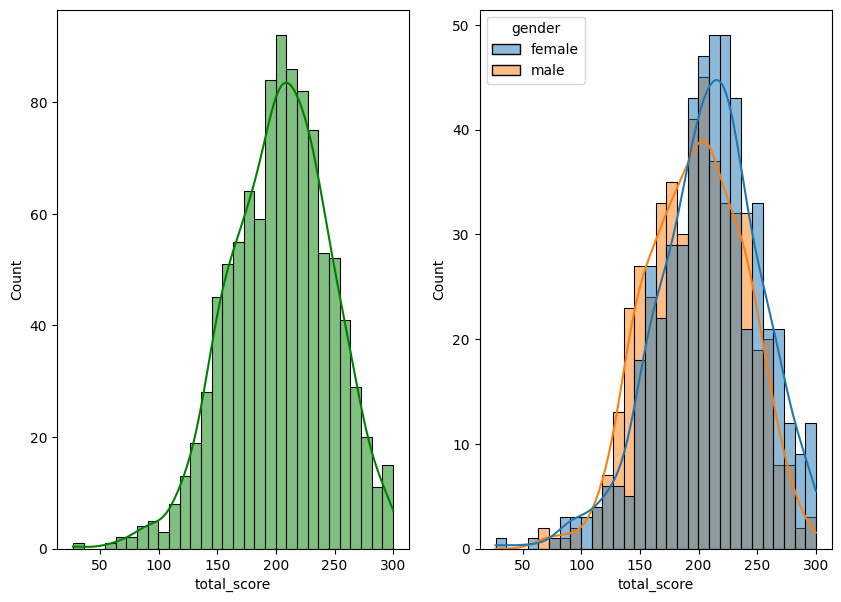

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
plt.subplot(121)
sns.histplot(data=df, x="total_score", bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x="total_score", bins=30, kde=True,hue="gender")
plt.show()

Female students tend to perform better than Male students

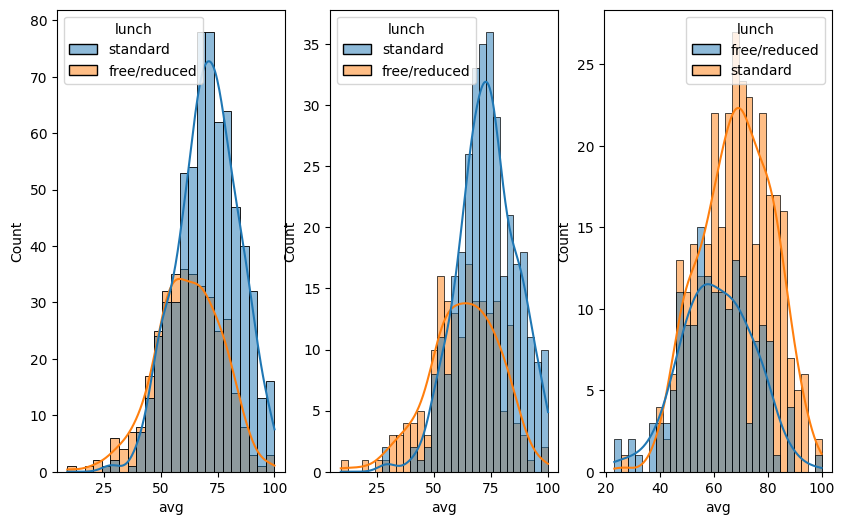

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
plt.subplot(131)
sns.histplot(data=df, x="avg", kde=True, hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df.gender =="female"], x="avg", bins=30, kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df.gender =="male"], x="avg", bins=30, kde=True,hue="lunch")
plt.show()

Insights : Generally student with std lunch plan perform better than free/reduced lunch plan

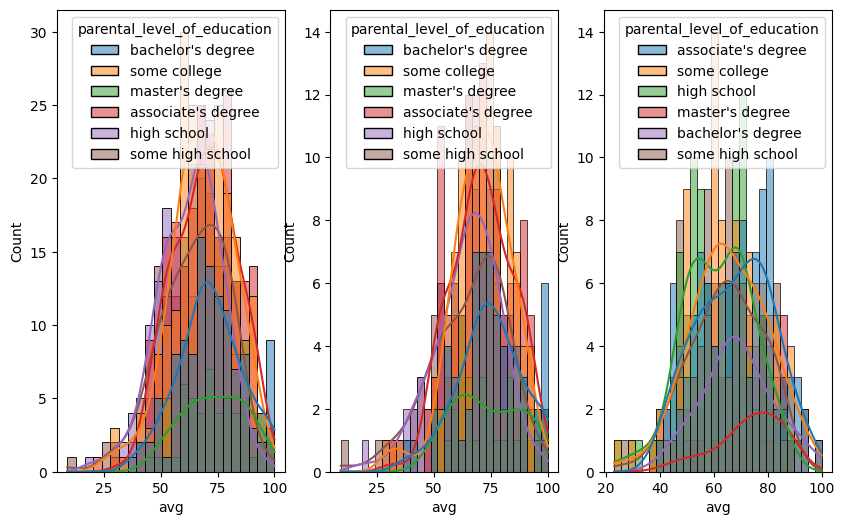

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
plt.subplot(131)
sns.histplot(data=df, x="avg", kde=True, hue="parental_level_of_education")
plt.subplot(132)
sns.histplot(data=df[df.gender =="female"], x="avg", bins=30, kde=True,hue="parental_level_of_education")
plt.subplot(133)
sns.histplot(data=df[df.gender =="male"], x="avg", bins=30, kde=True,hue="parental_level_of_education")
plt.show()

## Insights
- In general parent's education don't help student perform well in exam.
- In 2nd plot we can see there is no effect of parent's education on female students.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

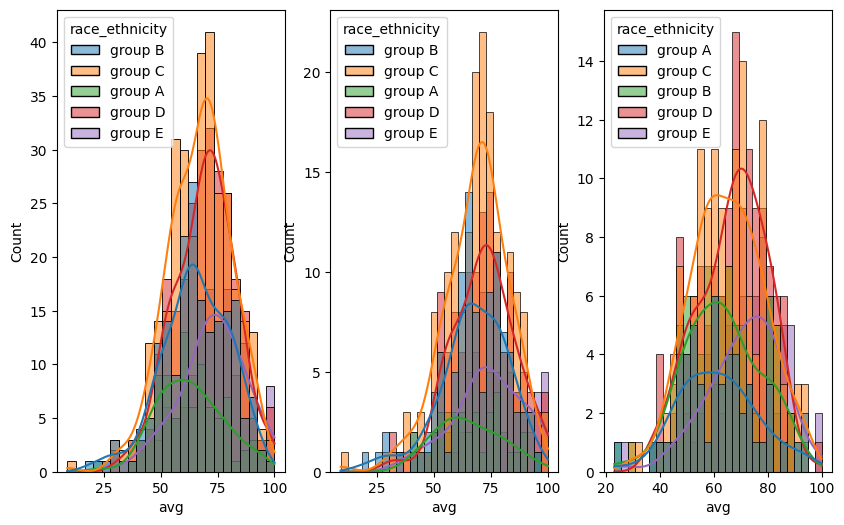

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
plt.subplot(131)
sns.histplot(data=df, x="avg", kde=True, hue="race_ethnicity")
plt.subplot(132)
sns.histplot(data=df[df.gender =="female"], x="avg", bins=30, kde=True,hue="race_ethnicity")
plt.subplot(133)
sns.histplot(data=df[df.gender =="male"], x="avg", bins=30, kde=True,hue="race_ethnicity")
plt.show()

## Insights:
for male students race/ethnicity doesnt matter, while for female students group C students perform much better as comapred to other groups.
In general students of Group A and B dont perform well in exams irrespective of their gender

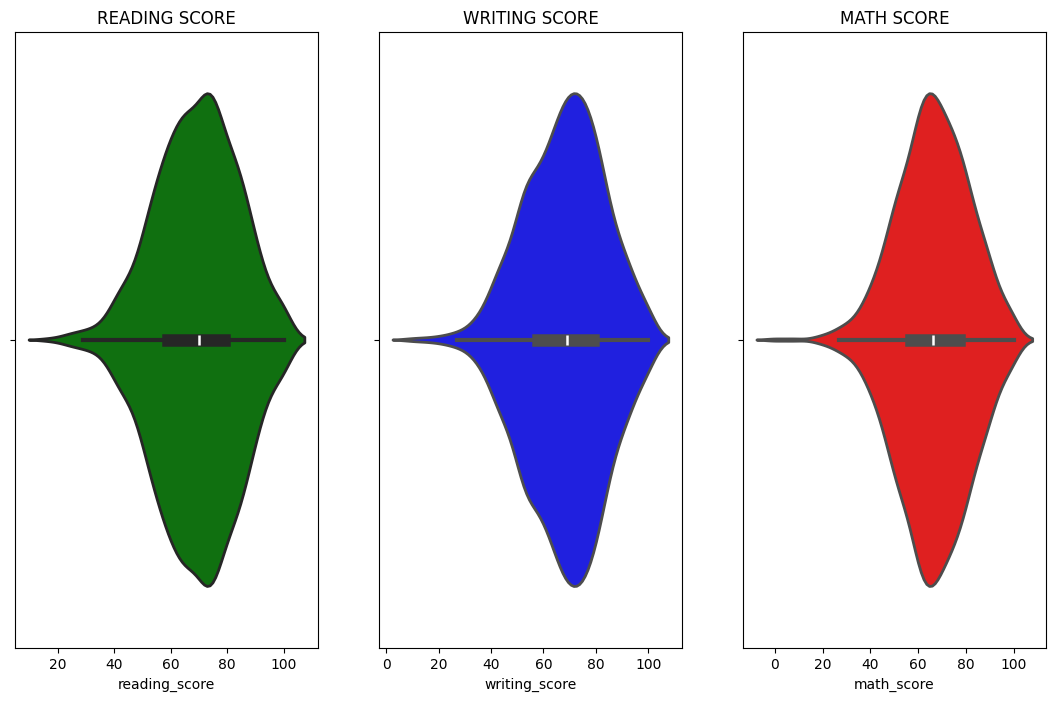

In [39]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title("READING SCORE")
sns.violinplot( data=df, x="reading_score", color = 'green', linewidth= 2)
plt.subplot(1, 4, 2)
plt.title("WRITING SCORE")
sns.violinplot(x="writing_score", data=df, color = 'blue', linewidth= 2)
plt.subplot(1, 4, 3)
plt.title("MATH SCORE")
sns.violinplot(x="math_score", data=df, color = 'red', linewidth= 2)
plt.show()

## Insights:
Most of the students score between 60-80 marks in all the tests

### Multivariate Analysis

In [42]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg'],
      dtype='object')

In [52]:
df["test_preparation_course"].unique()

array(['none', 'completed'], dtype=object)

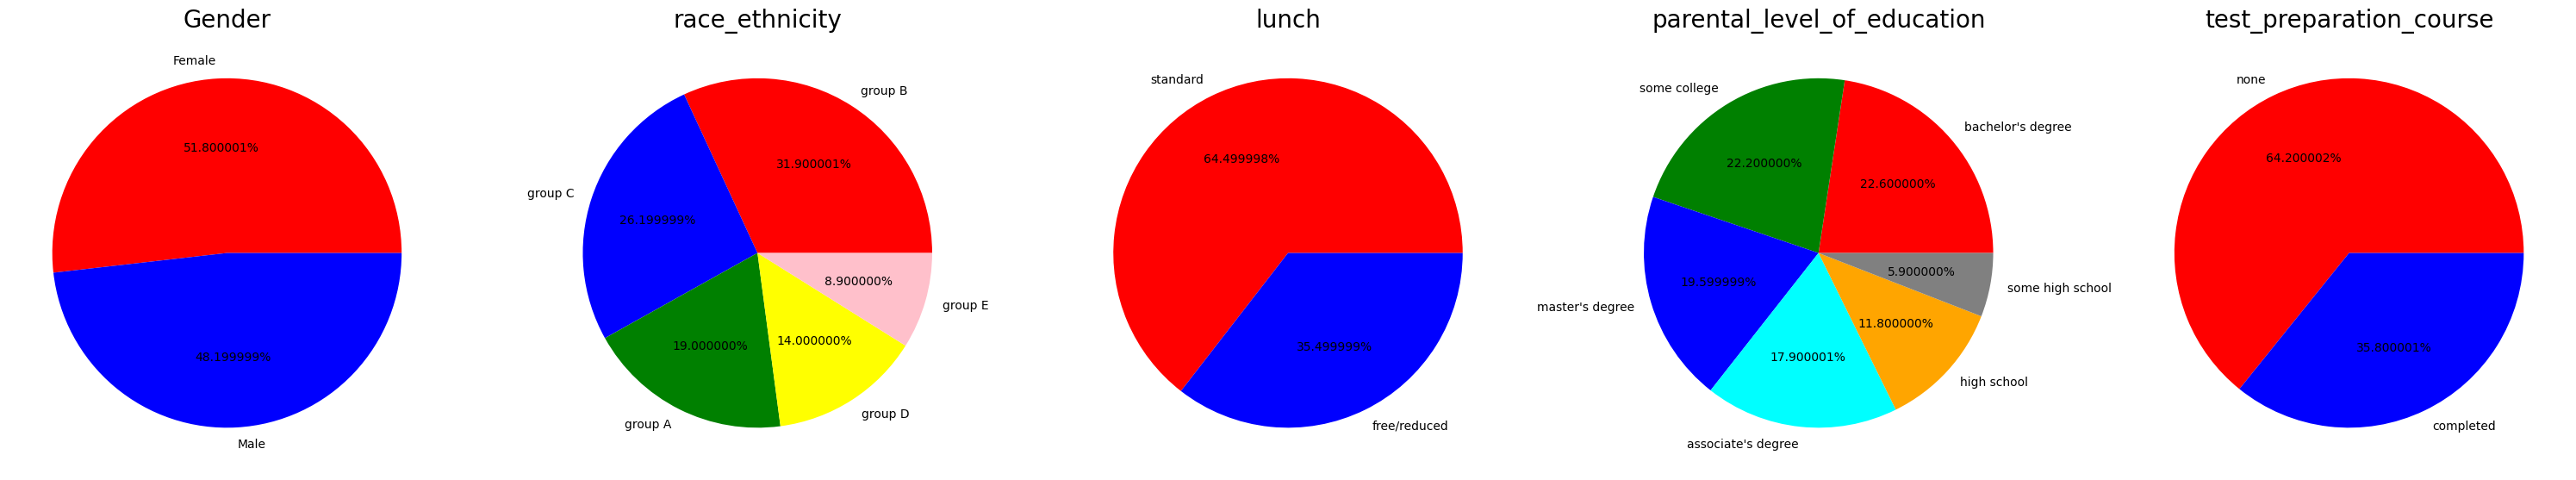

In [57]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1, 5, 1)
size = df["gender"].value_counts()
labels = "Female" , "Male"
color = "Red" , "Blue"

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df["race_ethnicity"].value_counts()
labels = ['group B', 'group C', 'group A', 'group D', 'group E']
color = ["Red" , "Blue", "green", "yellow", "pink"]

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df["lunch"].value_counts()
labels = 'standard', 'free/reduced'
color = ["Red" , "Blue"]

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df["parental_level_of_education"].value_counts()
labels = "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('parental_level_of_education', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df["test_preparation_course"].value_counts()
labels = 'none', 'completed'
color = ["Red" , "Blue"]

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('test_preparation_course', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

## Insights:
1) Number of male and female students are almost same
2) Group B has most no. students
3) Most no. of students hv standard lunch
4) Most % of parents hv bachelor degree
5) Most no. of students have not enrolled in test preparation course


### Univariate analysis: feature wise

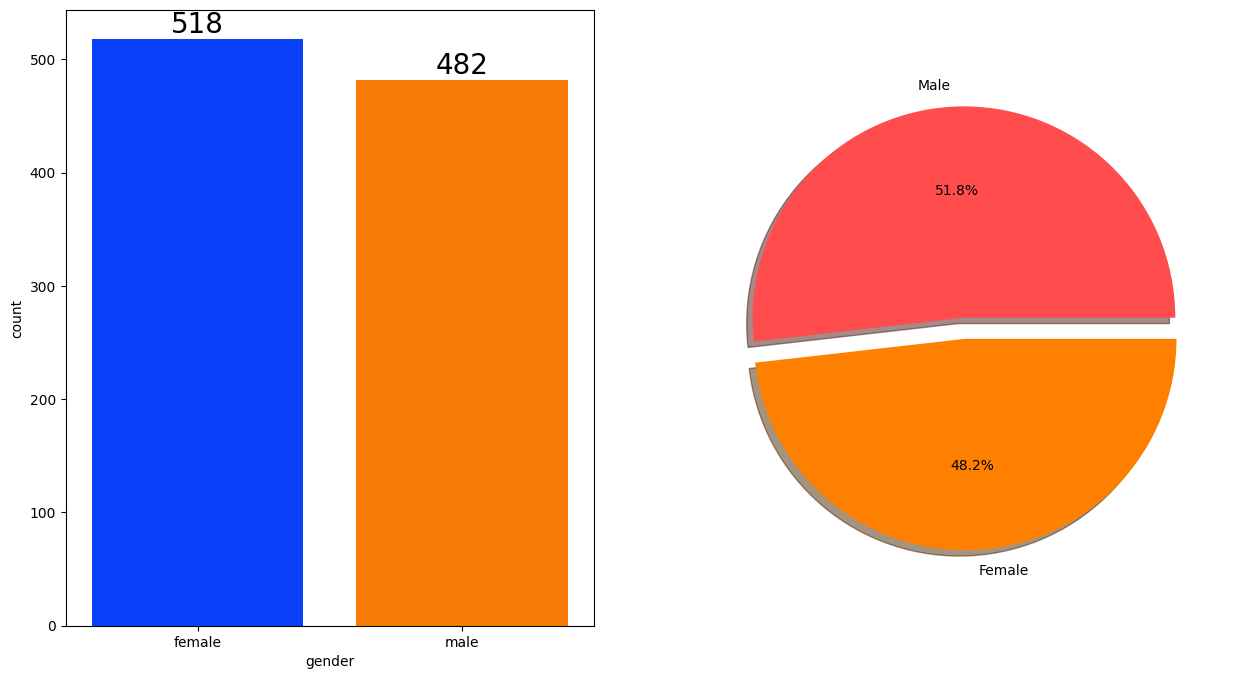

In [61]:
f, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(x = df["gender"], data=df, palette='bright', ax = ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df["gender"].value_counts(), labels=["Male" , "Female"], explode=[0, 0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


### Bivariate Analysis on Gender 

In [81]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg'],
      dtype='object')

In [96]:
gender_group = df.groupby('gender').agg({'math_score': 'mean', 'reading_score': 'mean', 'writing_score': 'mean', 'total_score': 'mean', 
                    'avg': 'mean'})
gender_group

,math_score,reading_score,writing_score,total_score,avg
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


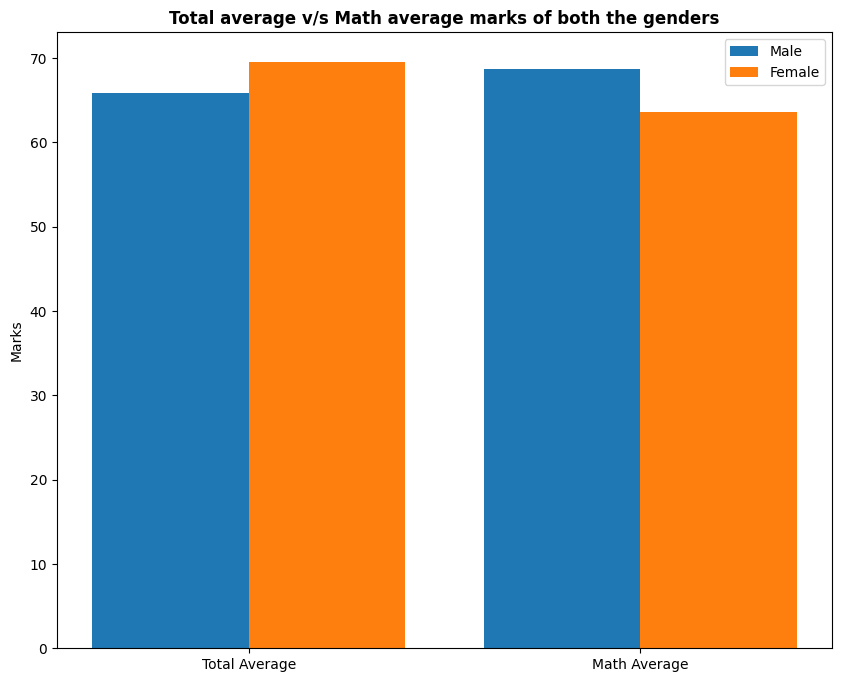

In [97]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg'][0], gender_group['math_score'][0]]
male_scores = [gender_group['avg'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## Insights:
Female students have better total avg than male, but less math avg than male

Based on Race & Ethnicity

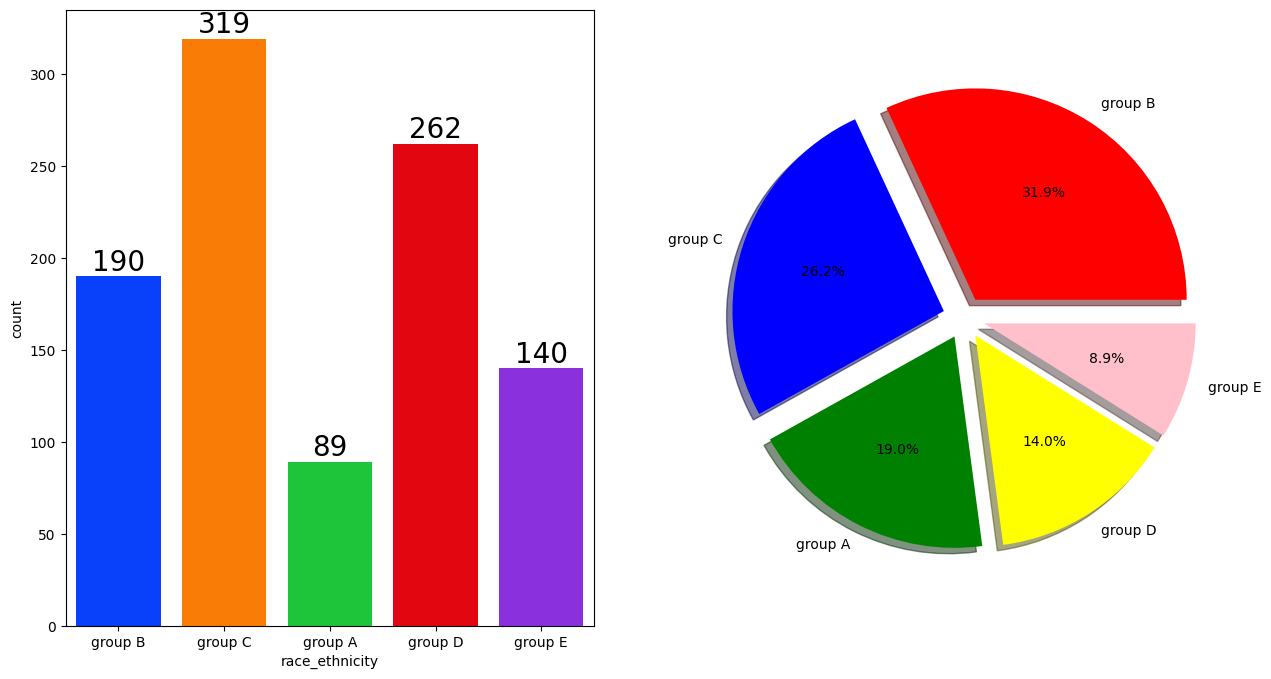

In [98]:
f, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(x = df["race_ethnicity"], data=df, palette='bright', ax = ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

label = ['group B', 'group C', 'group A', 'group D', 'group E']
color = ["Red" , "Blue", "green", "yellow", "pink"]
plt.pie(x=df["race_ethnicity"].value_counts(), labels=label, explode=[0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%',shadow=True,colors=color)
plt.show()

Most students belong to Group C and D

### Student Performace based on Race & Ethnicity

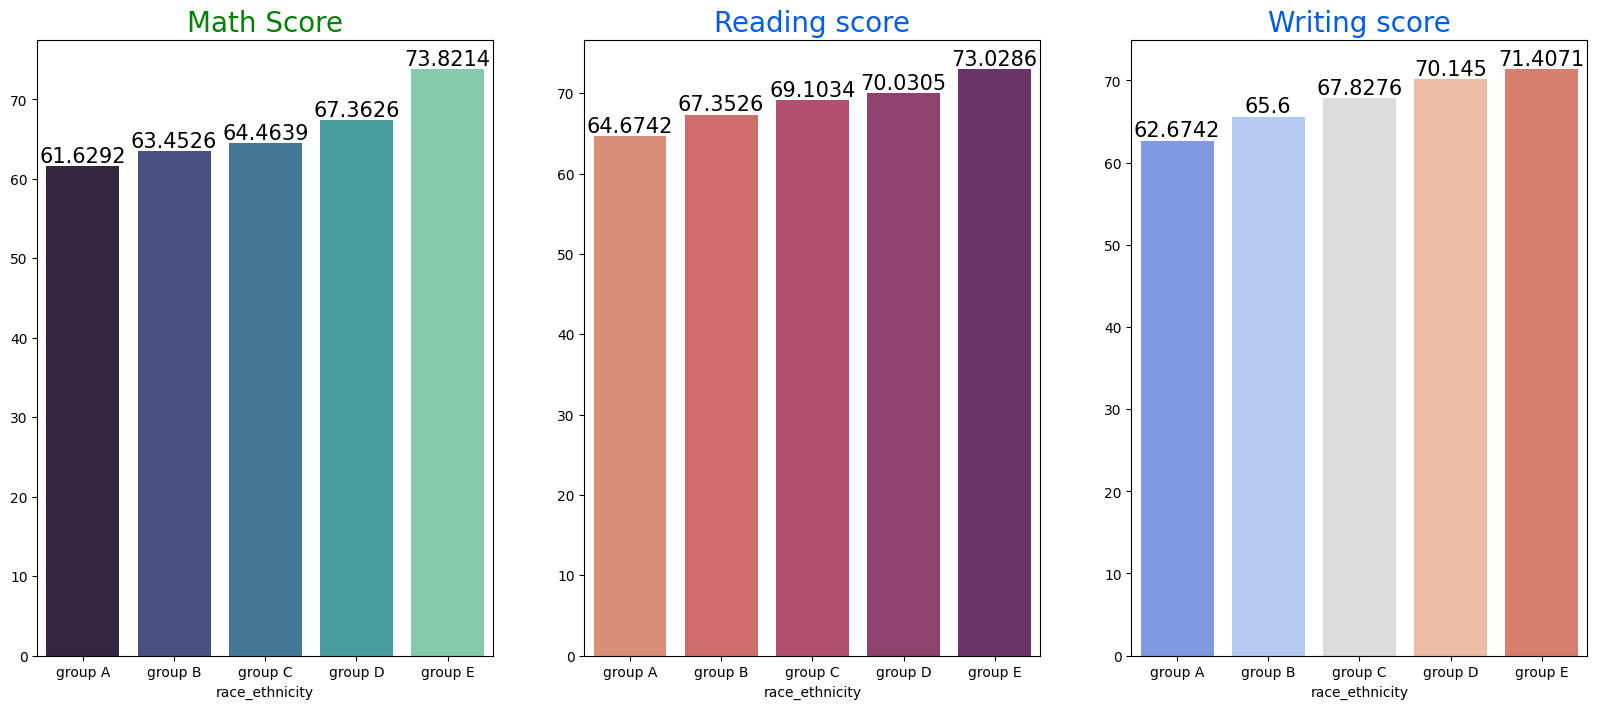

In [103]:
group_data = df.groupby("race_ethnicity")
f, ax = plt.subplots(1, 3, figsize= (20,8))
sns.barplot(x= group_data["math_score"].mean().index, y= group_data["math_score"].mean().values, palette="mako", ax = ax[0])
ax[0].set_title("Math Score", color="green" , size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size =15)

sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


### Insights:
Group E students perform best in all 3 categories while group A students perform worst in all 3 categories

### Student Performace based on Parent's Educational Background

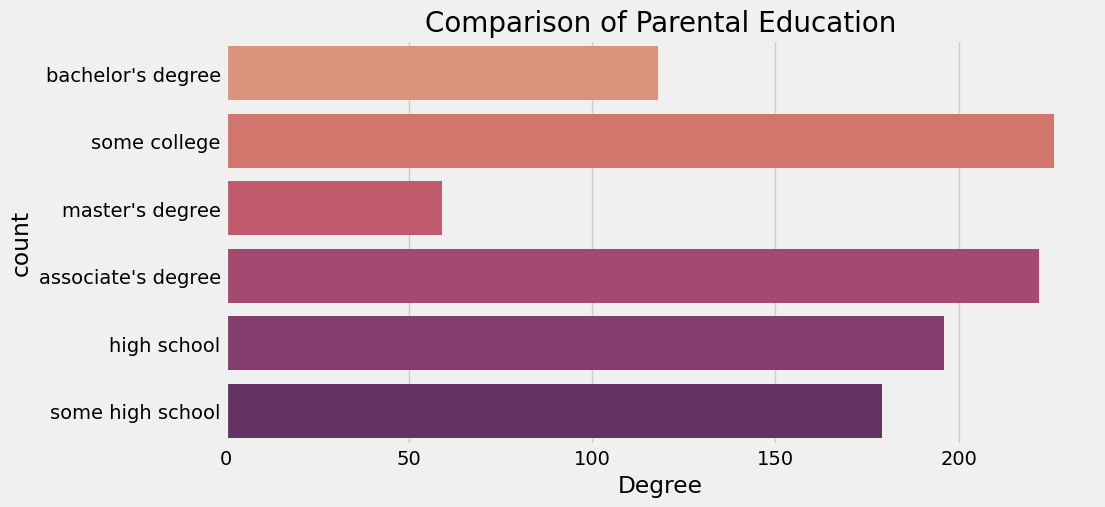

In [109]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'flare')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Most Parents are from Some College

### Impact of student's performance coz of Parents education

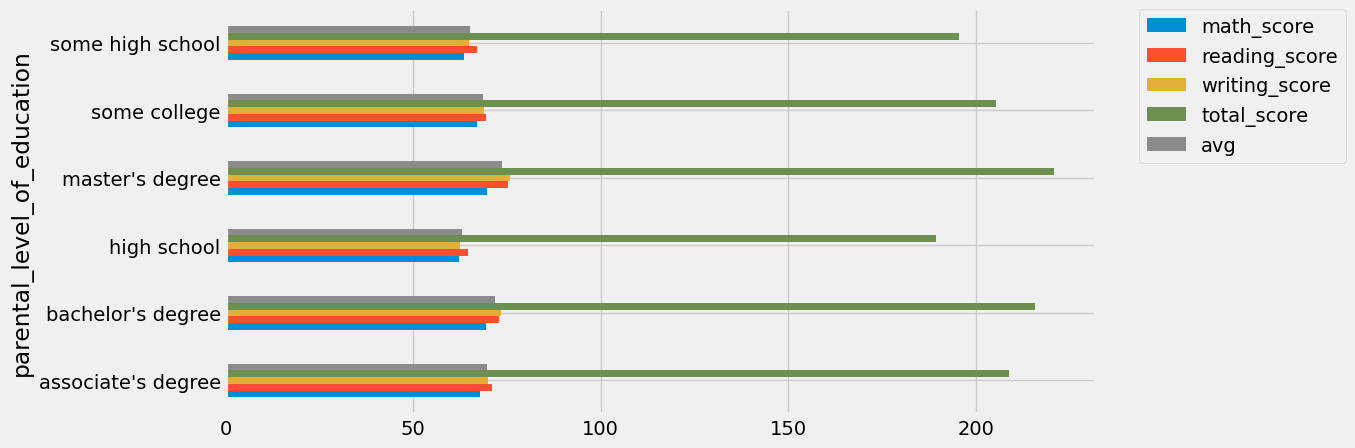

In [111]:
df.groupby("parental_level_of_education").agg({'math_score': 'mean', 'reading_score': 'mean', 'writing_score': 'mean', 'total_score': 'mean', 
                    'avg': 'mean'}).plot(kind='barh', figsize=(10,5))
plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights:
The score of student whose parents possess master and bachelor level education are higher than others.

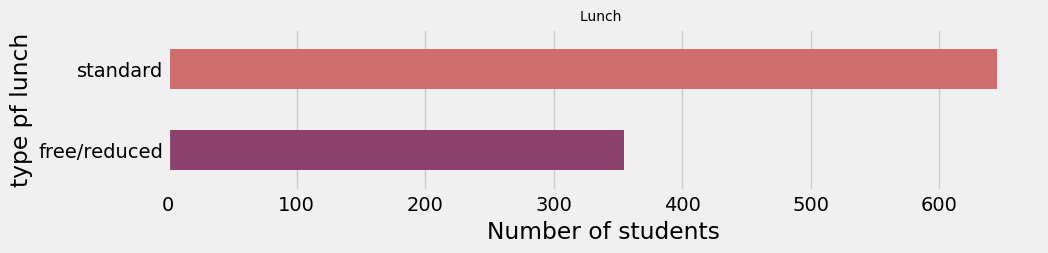

In [117]:
plt.rcParams['figure.figsize'] = (10, 2)
sns.countplot(df['lunch'], palette = 'flare', width=0.5)
plt.title('Lunch ', fontweight = 15, fontsize = 10)
plt.xlabel('Number of students')
plt.ylabel('type pf lunch')
plt.show()

### Insights:
more number of students receive Standard lunch as compared to free/reduced lunch

### Student Performace based on Lunch

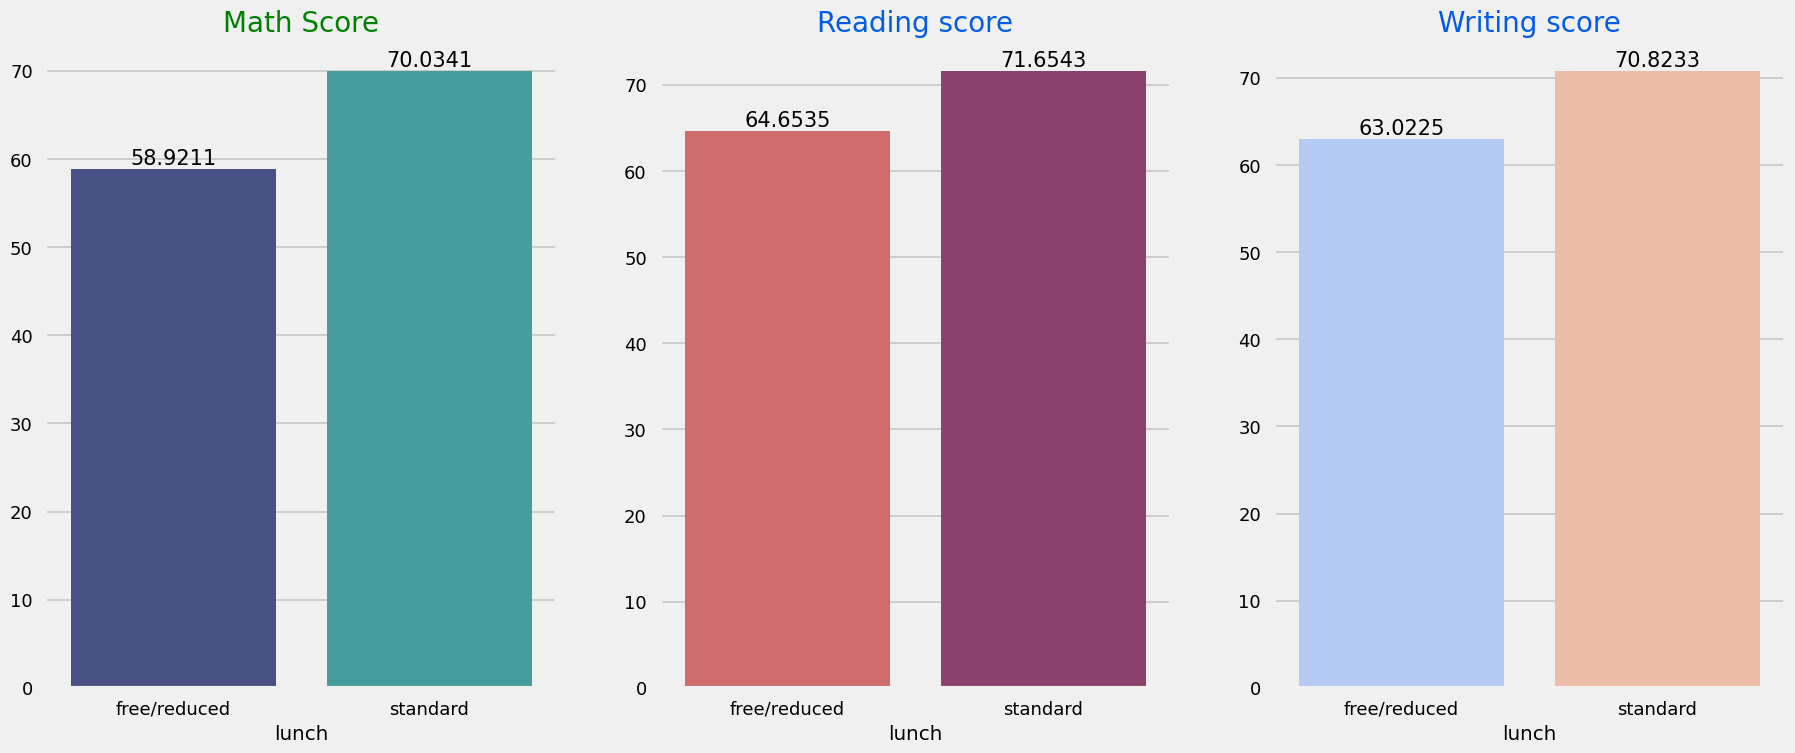

In [125]:
group_data1 = df.groupby("lunch")
f, ax = plt.subplots(1, 3, figsize= (20,8))
sns.barplot(x= group_data1["math_score"].mean().index, y= group_data1["math_score"].mean().values, palette="mako", ax = ax[0])
ax[0].set_title("Math Score", color="green" , size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size =15)

sns.barplot(x=group_data1['reading_score'].mean().index,y=group_data1['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data1['writing_score'].mean().index,y=group_data1['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


### Insights:
Students with Standard Lunch perform better than students with Free/Reduced Lunch in all categories

## Analysis Based on Test Preparation Course

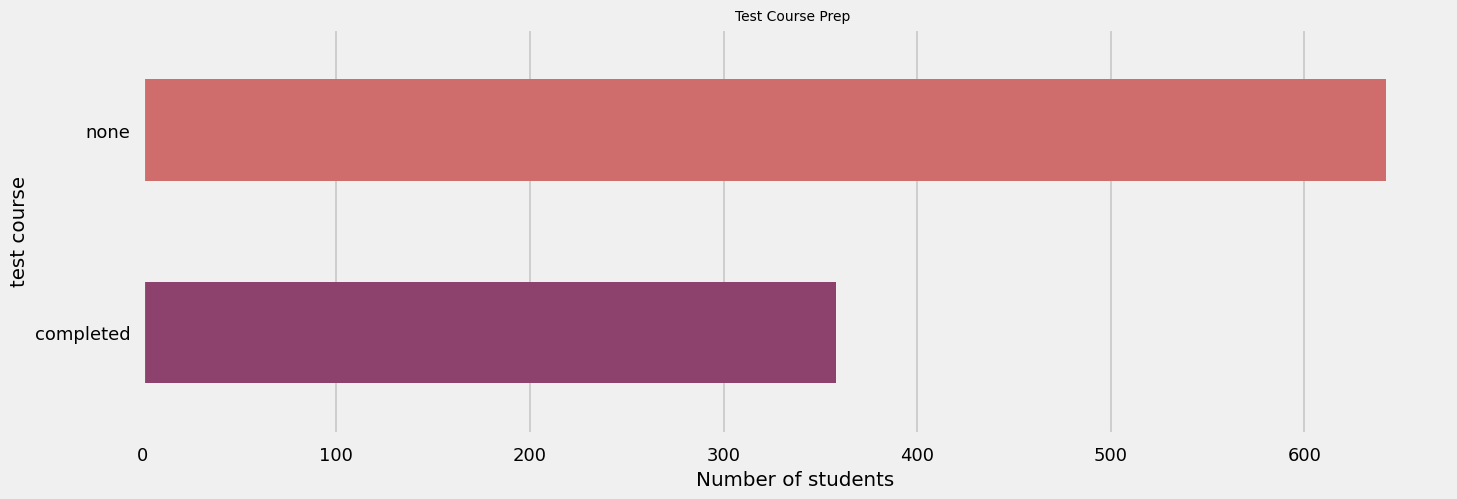

In [135]:
plt.figure(figsize=(15,5))
sns.countplot(df['test_preparation_course'], palette = 'flare', width=0.5)
plt.title('Test Course Prep ', fontweight = 15, fontsize = 10)
plt.xlabel('Number of students')
plt.ylabel('test course')

plt.show()

More no. of students havent take test prep course

### Student Performace based on test Course Preparation

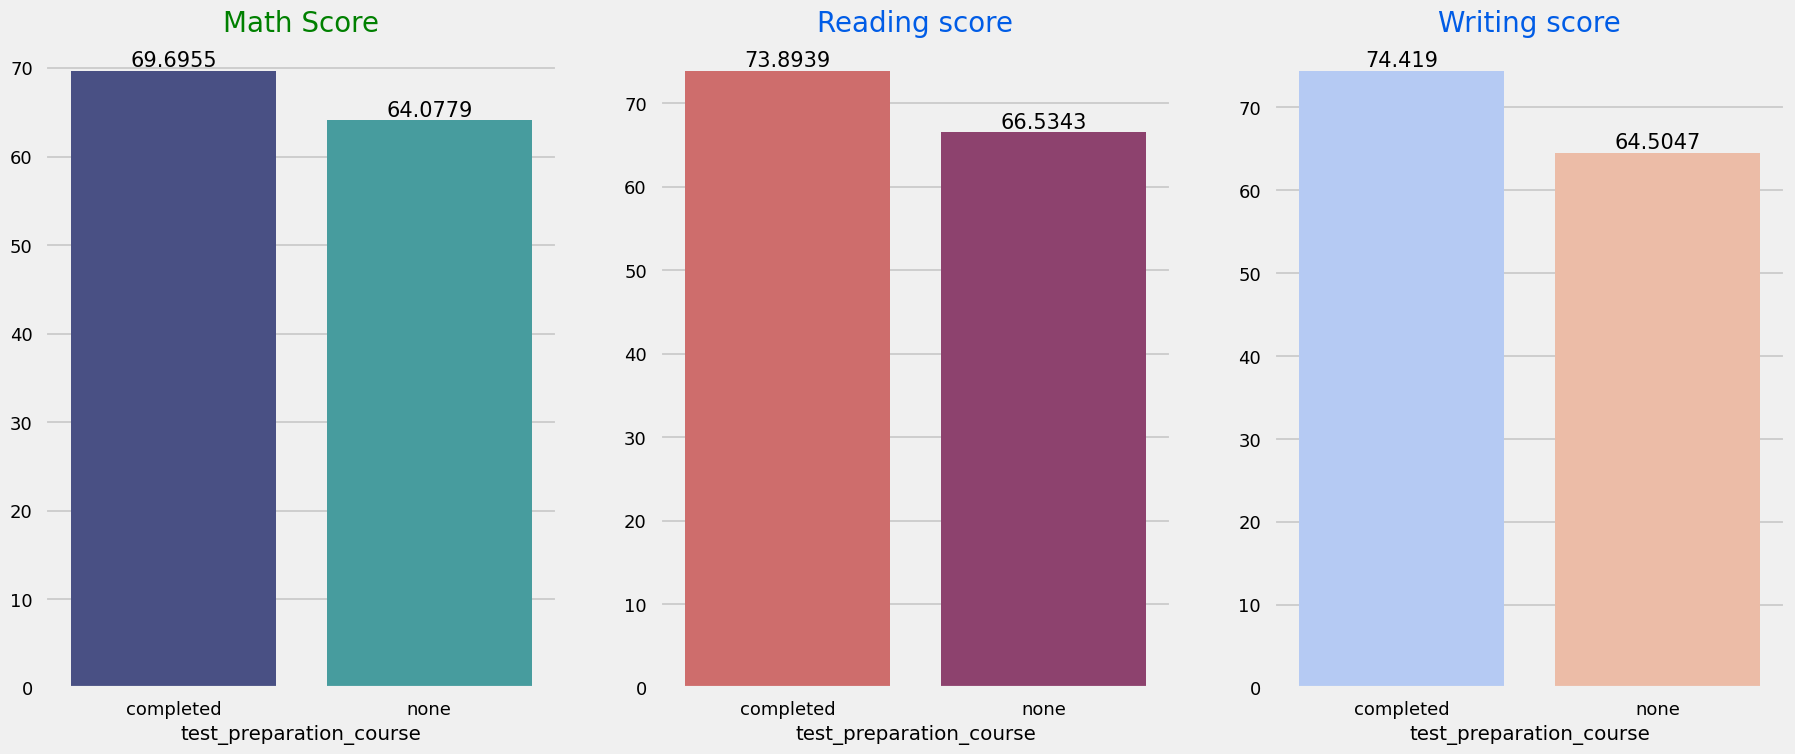

In [126]:
group_data2 = df.groupby("test_preparation_course")
f, ax = plt.subplots(1, 3, figsize= (20,8))
sns.barplot(x= group_data2["math_score"].mean().index, y= group_data2["math_score"].mean().values, palette="mako", ax = ax[0])
ax[0].set_title("Math Score", color="green" , size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size =15)

sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights:
Students who hv completed test course prep have score more than students who havent completed course in all categories

# CHECKING OUTLIERS

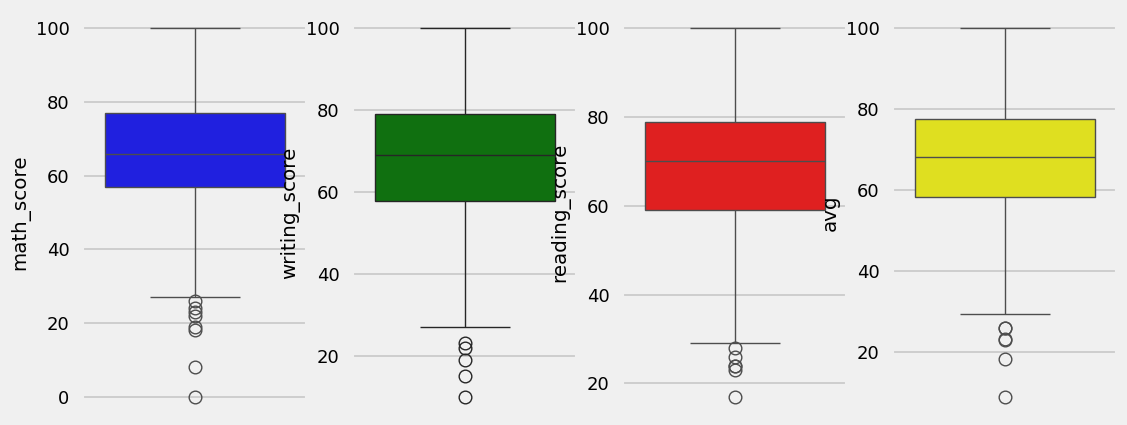

In [140]:
plt.subplots(1, 4, figsize=(15,5))
plt.subplot(151)
sns.boxplot(df["math_score"], color="blue")
plt.subplot(152)
sns.boxplot(df["writing_score"], color="green")
plt.subplot(153)
sns.boxplot(df["reading_score"], color="red")
plt.subplot(154)
sns.boxplot(df["avg"], color="yellow")
plt.show()

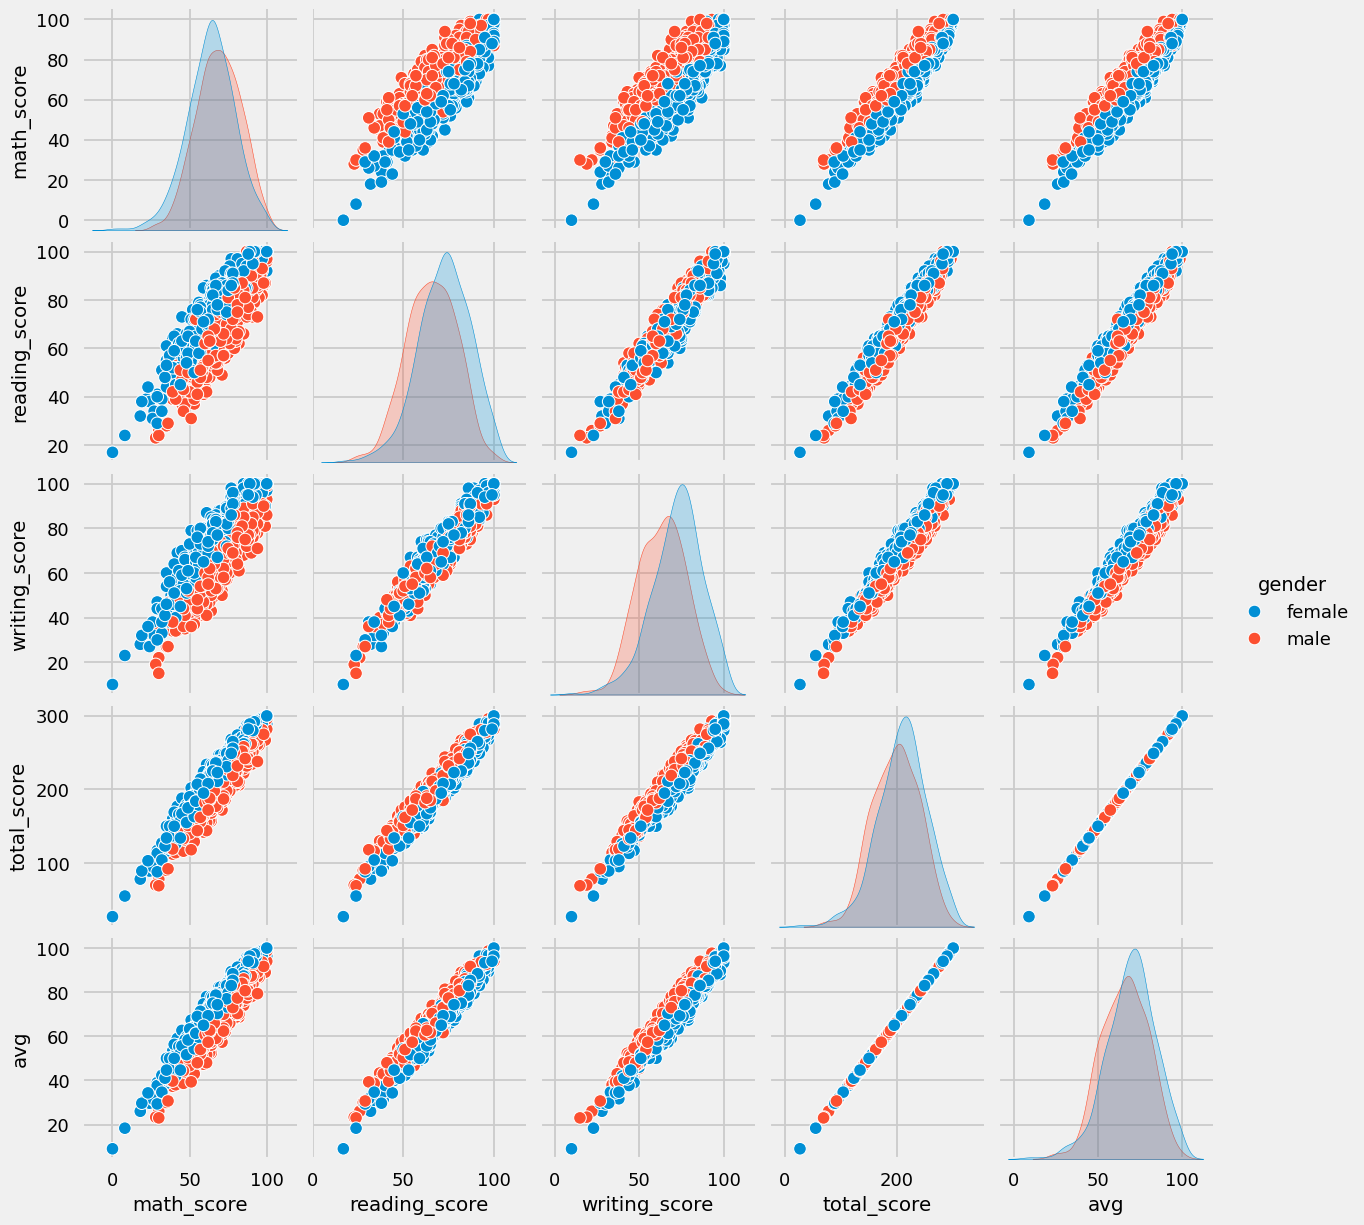

In [141]:
sns.pairplot(df,hue = 'gender')
plt.show()

Above graph shows that all the values increase Linearly wrt each other

## Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.